In [1]:
import pandas as pd
import numpy as np

In [2]:
data_folder = "../input/"

In [3]:
df_asset = pd.read_csv(data_folder + "asset_details.csv", index_col=0)
df_asset.sort_values(by=['Weight'], ascending=False)

,Weight,Asset_Name
Asset_ID,,
1,6.779922,Bitcoin
6,5.894403,Ethereum
3,4.406719,Cardano
0,4.304065,Binance Coin
4,3.555348,Dogecoin
2,2.397895,Bitcoin Cash
9,2.397895,Litecoin
7,2.079442,Ethereum Classic
12,2.079442,Stellar


In [4]:
df = pd.read_csv(data_folder + "train.csv")
df.head(100)

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target
0,1514764860,2,40.0,2376.580000,2399.5000,2357.1400,2374.590000,19.233005,2373.116392,-0.004218
1,1514764860,0,5.0,8.530000,8.5300,8.5300,8.530000,78.380000,8.530000,-0.014399
2,1514764860,1,229.0,13835.194000,14013.8000,13666.1100,13850.176000,31.550062,13827.062093,-0.014643
3,1514764860,5,32.0,7.659600,7.6596,7.6567,7.657600,6626.713370,7.657713,-0.013922
4,1514764860,7,5.0,25.920000,25.9200,25.8740,25.877000,121.087310,25.891363,-0.008264
...,...,...,...,...,...,...,...,...,...,...
95,1514765520,11,8.0,327.670000,327.6800,326.7700,326.770000,17.901633,326.990493,NaN
96,1514765580,2,38.0,2366.833333,2398.2000,2340.6000,2365.376667,8.981063,2364.424826,-0.000176
97,1514765580,0,24.0,8.399100,8.4559,8.3573,8.420000,604.390000,8.413630,-0.007573
98,1514765580,1,257.0,13690.790000,13900.0000,13473.4700,13696.638000,21.794143,13691.957069,-0.003605


In [28]:
assets = df.head(10000)
assets.head(10)

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target
0,1514764860,2,40.0,2376.580000,2399.5000,2357.1400,2374.590000,19.233005,2373.116392,-0.004218
1,1514764860,0,5.0,8.530000,8.5300,8.5300,8.530000,78.380000,8.530000,-0.014399
2,1514764860,1,229.0,13835.194000,14013.8000,13666.1100,13850.176000,31.550062,13827.062093,-0.014643
3,1514764860,5,32.0,7.659600,7.6596,7.6567,7.657600,6626.713370,7.657713,-0.013922
4,1514764860,7,5.0,25.920000,25.9200,25.8740,25.877000,121.087310,25.891363,-0.008264
5,1514764860,6,173.0,738.302500,746.0000,732.5100,738.507500,335.987856,738.839291,-0.004809
6,1514764860,9,167.0,225.330000,227.7800,222.9800,225.206667,411.896642,225.197944,-0.009791
7,1514764860,11,7.0,329.090000,329.8800,329.0900,329.460000,6.635710,329.454118,NaN
8,1514764920,2,53.0,2374.553333,2400.9000,2354.2000,2372.286667,24.050259,2371.434498,-0.004079
9,1514764920,0,7.0,8.530000,8.5300,8.5145,8.514500,71.390000,8.520215,-0.015875


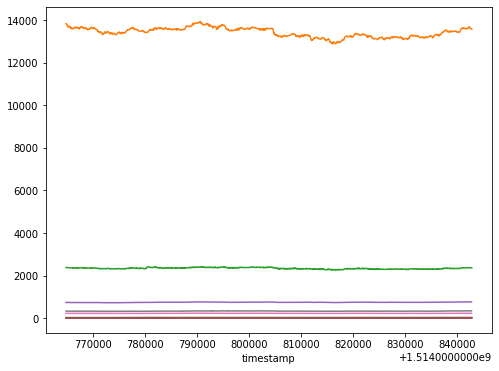

In [29]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(8,6))

assets.groupby('Asset_ID').plot(x="timestamp", y="Open", kind="line", ax=ax, legend=False)
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

plt.show()

In [14]:
from tslearn.utils import to_time_series_dataset
from tslearn.preprocessing import TimeSeriesScalerMeanVariance

labels, time_series = [] , []
for asset, group in assets.groupby("Asset_ID"):
    labels.append(asset)
    time_series.append(group["Open"].array)

# On formatte les séries temporelles
time_series = to_time_series_dataset(time_series)
# On normalise ces mêmes séries
time_series = TimeSeriesScalerMeanVariance().fit_transform(time_series)

time_series.shape

(10, 120228, 1)

In [24]:
from tslearn.clustering import TimeSeriesKMeans
n_classes = 3

model = TimeSeriesKMeans(n_clusters=n_classes, metric="euclidean")
model.fit(time_series)

TimeSeriesKMeans()

In [25]:
TimeSeriesKMeans()

TimeSeriesKMeans()

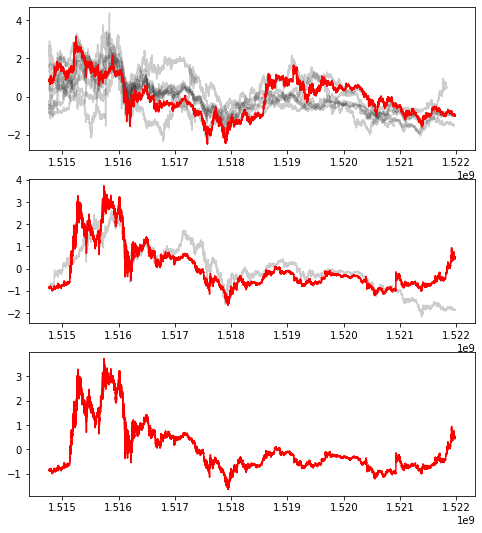

In [26]:
import matplotlib.dates as mdates

fig = plt.figure(figsize=(8,n_classes * 3))

# On récupère les dates des différentes observations
time_labels = assets["timestamp"].unique()

# Pour chaque classe
for yi in range(n_classes):
    ax = fig.add_subplot(n_classes, 1, 1 + yi)

    # On sélectionne les séries qui correspondent à cette classe
    for xx in time_series[model.labels_ == yi]:
        ax.plot(time_labels, xx, "k-", alpha=.2)

    # Le barycentre de la classe
    ax.plot(time_labels, model.cluster_centers_[yi].ravel(), "r-")

    # Pour formatter l'heure des observations
    #ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

plt.show()

This seems not to be working super great. Let us now stack every 100 second on top of each other and see whether we can find similar trends which occur often. 

In [41]:
labels, time_series = [] , []
for asset, group in assets.groupby("Asset_ID"):
    labels.append(asset)
    time_series.append(group["Open"].array)

In [56]:
time_series[1][:100]

<PandasArray>
[         13835.194, 13835.035999999998,            13823.9,
          13802.512,            13766.0, 13717.714000000002,
          13720.922,          13669.246,          13713.412,
           13713.61,          13719.018,          13703.404,
           13690.79, 13688.491999999998,          13702.502,
          13620.185,           13654.02,          13625.404,
 13615.378000000002,          13626.248,           13600.49,
          13606.468, 13610.204000000002,          13599.362,
          13601.328, 13630.963999999998,          13656.364,
          13653.882,          13649.434,           13638.62,
          13640.674,            13656.3,           13669.62,
            13673.2, 13650.721999999998,          13667.614,
          13662.738, 13640.964000000002, 13628.570000000003,
 13649.295999999998,          13641.096, 13635.714000000002,
          13584.805, 13628.795999999998, 13636.329999999998,
 13634.473999999998, 13639.765999999998,           13682.21,
          

In [66]:
minimal_element_length = np.min([len(time_series[i]) for i in range(len(time_series))])

length_interval = 100
tot_nb_intervals = minimal_element_length // 100 

labels_segments = []
time_series_segments = []

for i in range(len(time_series)):
    for j in range(tot_nb_intervals):
        labels_segments.append(labels[i] * 100 + j)
        time_series_segments.append(time_series[i][length_interval*j:length_interval*(j+1)])

print(labels_segments)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 600, 601, 602, 603, 604, 605, 606, 607, 608, 609, 610, 700, 701, 702, 703, 704, 705, 706, 707, 708, 709, 710, 900, 901, 902, 903, 904, 905, 906, 907, 908, 909, 910, 1100, 1101, 1102, 1103, 1104, 1105, 1106, 1107, 1108, 1109, 1110]


In [67]:
# On formatte les séries temporelles
time_series_segments = to_time_series_dataset(time_series_segments)
# On normalise ces mêmes séries
time_series_segments = TimeSeriesScalerMeanVariance().fit_transform(time_series_segments)

time_series_segments.shape

(88, 100, 1)

In [69]:
n_classes = 10

model = TimeSeriesKMeans(n_clusters=n_classes, metric="euclidean")
model.fit(time_series_segments)

TimeSeriesKMeans(n_clusters=10)

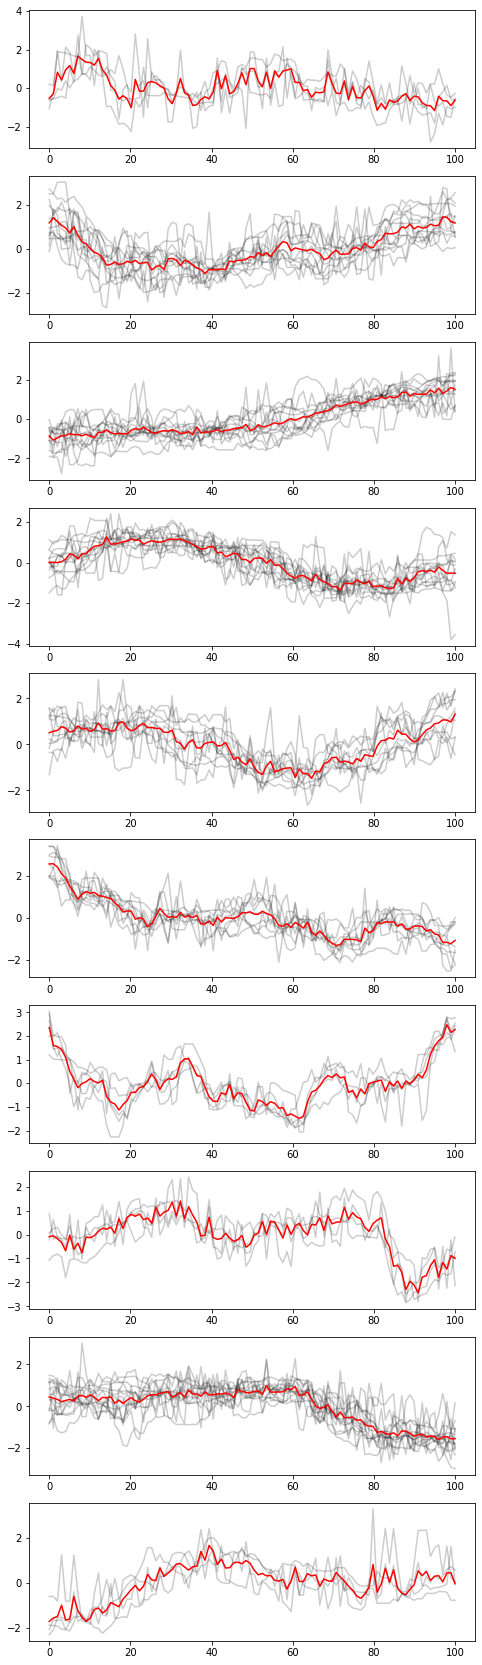

In [73]:
fig = plt.figure(figsize=(8,n_classes * 3))

# On récupère les dates des différentes observations
time_labels = np.linspace(0,100,length_interval)

# Pour chaque classe
for yi in range(n_classes):
    ax = fig.add_subplot(n_classes, 1, 1 + yi)

    # On sélectionne les séries qui correspondent à cette classe
    for xx in time_series_segments[model.labels_ == yi]:
        ax.plot(time_labels, xx, "k-", alpha=.2)

    # Le barycentre de la classe
    ax.plot(time_labels, model.cluster_centers_[yi].ravel(), "r-")

plt.show()